<h1>Support Vector Machine (SVM)</h1>
<br>
Training data is taken from scikit learn dataset. It is called Iris.
<br>
Tl;dr: run whole notebook and youll get a plot with training data and test data.

Support Vector Machine (SVM) is one of the most popular algorithms in machine learning. It delivers impressive classification on reasonably sized datasets.
<br>
On extremely large datasets the algorithm becomes computationally very expensive.

In [1]:
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class support_vector_machine:
    def __init__(self):
        pass
    
    # prepare the training data
    def prepare_data(self):
        iris = datasets.load_iris()
        X = iris.data[:, :2]  # we only take the first two features: sepal length, sepal width
        self.val_x, self.val_y = self.dataset_to_col(X)
        target = iris.target
        return X, target

    # get color based on class (indices from 0 to 2)
    def get_color(self, index):
        colors = ["r", "g", "b"]  # 3 colors, one for each class
        return colors[index]

    # parse dataset to columns x and y
    def dataset_to_col(self, dataset):
        return dataset[:,0], dataset[:,1]

    # train
    def fit(self, X, target):
        clf = svm.SVC()
        clf.fit(X, target)
        return clf

    # predict class on new values
    def predict(self, clf, data):
        y_pred = clf.predict(data)
        return y_pred

    # visualize data
    def plot_train_data(self, data, target):
        target_color = [self.get_color(x) for x in target] #convert classes to colors
        val_x, val_y = self.dataset_to_col(data)
        plt.scatter(val_x, val_y, color=target_color) #plot the input data

    # generate test data
    def generate_test_data(self, n_data):
        max_x, min_x = self.val_x.max(), self.val_x.min()
        max_y, min_y = self.val_y.max(), self.val_y.min()
        test_val_x = np.random.uniform(low=min_x, high=max_x, size=n_data)
        test_val_y = np.random.uniform(low=min_y, high=max_y, size=n_data)
        test_val = np.array(list(zip(test_val_x, test_val_y)))
        return test_val

    # visualize test data with class
    def plot_test_data(self, test_data, y_pred):
        y_pred_color = [self.get_color(x) for x in y_pred]
        plt.scatter(test_data[:, 0], test_data[:, 1], color=y_pred_color, marker="*", s=150)

    ## methods copied from scikit-learn and changed to serve the purpose

    def make_meshgrid(self, x, y, h=.02):
        x_min, x_max = x.min() - 0.5, x.max() + 0.5
        y_min, y_max = y.min() - 0.5, y.max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(self, X, clf):
        x, y = self.dataset_to_col(X)
        xx, yy = self.make_meshgrid(x, y) # meshgrid: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # c_: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.c_.html
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z,15, colors=["#FF4D4D", "#0080ff", "#7FFA7F", "#000000"]) # lighter colors for contourf


In [3]:
n_test_data = 3 # number of test datapoints

In [4]:
s = support_vector_machine() # create an instance of a class
X, target = s.prepare_data()

clf = s.fit(X=X, target=target) # train the data, create a classifier
test_data = s.generate_test_data(n_data=n_test_data) # generate test data
print("Test data:\n", test_data)
y_pred = s.predict(clf=clf, data=test_data)

Test data:
 [[ 6.67421933  4.25708503]
 [ 5.26939835  3.89519043]
 [ 5.84429984  3.25179228]]


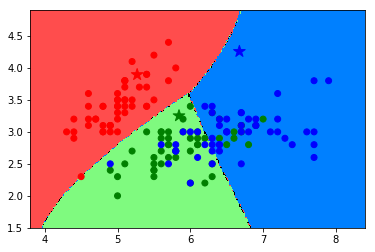

In [5]:
s.plot_contours(X=X, clf=clf)
s.plot_train_data(data=X, target=target)
s.plot_test_data(test_data=test_data, y_pred=y_pred)